In [1]:
%pip install opendatasets 
%pip install seaborn
%pip install seaborn matplotlib
%pip install scipy
%pip install keras
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

import pandas as pd  
import torch  
import torch.nn as nn  
from sklearn.preprocessing import MinMaxScaler 
from torch.utils.data import DataLoader, TensorDataset  

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset






In [3]:
# Faz o download do dataset # URL do dataset no Kaggle 
#od.download("https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15/data")

# Pré-Processamento

In [4]:
# Carregar o arquivo
df_train = pd.read_csv("unsw-nb15/UNSW_NB15_training-set.csv")
print(df_train.info()) # Verificar tipos de dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
# Carregar o arquivo
df_test = pd.read_csv("unsw-nb15/UNSW_NB15_testing-set.csv")
print(df_train.info())      # Verificar tipos de dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [6]:
print("Conjunto dos dados")
df_train


Conjunto dos dados


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [7]:
df_train['attack_cat'].value_counts()




attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

In [8]:
print("Conjunto de Treinamento")
df_train

Conjunto de Treinamento


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [9]:
# Selecionar e imprimir colunas que possuem strings
string_columns = df_train.select_dtypes(include=['object', 'string'])
print(string_columns)


      proto service state attack_cat
0       udp       -   INT     Normal
1       udp       -   INT     Normal
2       udp       -   INT     Normal
3       udp       -   INT     Normal
4       udp       -   INT     Normal
...     ...     ...   ...        ...
82327   udp       -   INT     Normal
82328   tcp       -   FIN     Normal
82329   arp       -   INT     Normal
82330   arp       -   INT     Normal
82331   udp       -   INT     Normal

[82332 rows x 4 columns]


In [10]:
print("Conjunto de Teste")
df_test

Conjunto de Teste


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [11]:
# Concatenando os DataFrames para criar um único DataFrame
df = pd.concat([df_train, df_test], ignore_index=True)

# Exibindo os tamanhos dos conjuntos resultantes
print(f"Tamanho do Conjunto de Dados Completo: {len(df)}")
print(f"Tamanho do Conjunto de Treinamento: {len(df_train)}")
print(f"Tamanho do Conjunto de Teste: {len(df_test)}")

Tamanho do Conjunto de Dados Completo: 257673
Tamanho do Conjunto de Treinamento: 82332
Tamanho do Conjunto de Teste: 175341


In [12]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

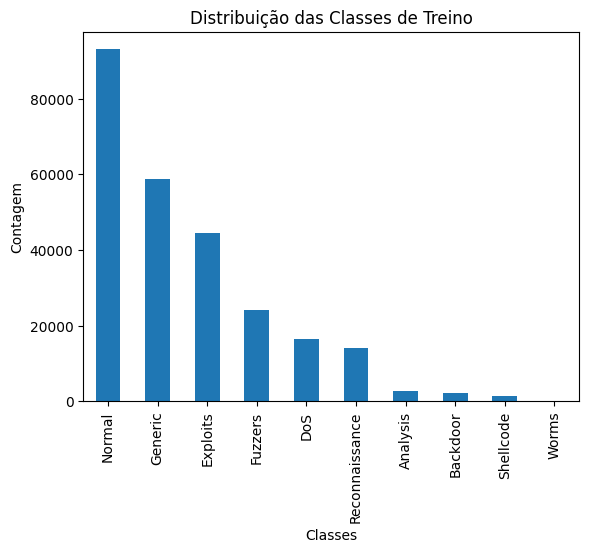

In [13]:
# #distribuição dos dados nas classes 
df["attack_cat"].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes de Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


# Pré Processamento

In [14]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [15]:
df_train['attack_cat'].value_counts()


attack_cat
Normal            64974
Generic           41282
Exploits          31197
Fuzzers           17022
DoS               11395
Reconnaissance     9794
Analysis           1893
Backdoor           1633
Shellcode          1054
Worms               127
Name: count, dtype: int64

In [16]:
df_train.attack_cat=df_train.attack_cat.apply(lambda x: 0 if x == 'Normal' else 1)
df_train['attack_cat'].value_counts()



attack_cat
1    115397
0     64974
Name: count, dtype: int64

In [17]:
# Filtrar os dados normais
normal_train_df = df_train[df_train['attack_cat'] == 0]  # 0 representa 'normal'

# Printar a quantidade de dados que sobraram
print('Quantidade de dados normais restantes:')
normal_train_df['attack_cat'].value_counts()


Quantidade de dados normais restantes:


attack_cat
0    64974
Name: count, dtype: int64

In [18]:
# Remover a coluna de rótulo
normal_train_df = normal_train_df.drop(columns=['attack_cat'])


In [19]:
# Imprimir informações sobre o DataFrame, incluindo os nomes das colunas e a quantidade total de colunas
normal_train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64974 entries, 107785 to 121958
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 64974 non-null  int64  
 1   dur                64974 non-null  float64
 2   proto              64974 non-null  object 
 3   service            64974 non-null  object 
 4   state              64974 non-null  object 
 5   spkts              64974 non-null  int64  
 6   dpkts              64974 non-null  int64  
 7   sbytes             64974 non-null  int64  
 8   dbytes             64974 non-null  int64  
 9   rate               64974 non-null  float64
 10  sttl               64974 non-null  int64  
 11  dttl               64974 non-null  int64  
 12  sload              64974 non-null  float64
 13  dload              64974 non-null  float64
 14  sloss              64974 non-null  int64  
 15  dloss              64974 non-null  int64  
 16  sinpkt             64

In [20]:
normal_train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [21]:
df_test['attack_cat'].value_counts()


attack_cat
Normal            28026
Generic           17589
Exploits          13328
Fuzzers            7224
DoS                4958
Reconnaissance     4193
Analysis            784
Backdoor            696
Shellcode           457
Worms                47
Name: count, dtype: int64

In [22]:
df_test.attack_cat=df_test.attack_cat.apply(lambda x: 0 if x == 'Normal' else 1)
df_test['attack_cat'].value_counts()


attack_cat
1    49276
0    28026
Name: count, dtype: int64

In [23]:
# Realizando o One-Hot Encoding nas colunas categóricas
normal_train_df = pd.get_dummies(normal_train_df, columns=['proto', 'service', 'service'], drop_first=True)
test_df = pd.get_dummies(df_test, columns=['proto', 'service', 'service'], drop_first=True)

# Alinhando os DataFrames de treino e teste para garantir que eles tenham as mesmas colunas
train_df, test_df = df_train.align(test_df, join='left', axis=1, fill_value=0)

# Selecionando apenas as colunas numéricas para normalização
numeric_cols = normal_train_df.select_dtypes(include=['float64', 'int64']).columns


# Normalizando os dados numéricos com MinMaxScaler
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(normal_train_df[numeric_cols])
X_test = scaler.transform(test_df[numeric_cols])

# Convertendo os dados normalizados para tensores
X_train_tensor_normal = torch.tensor(X_train_normal, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Criando o DataLoader para os dados normais 
train_dataset_normal = TensorDataset(X_train_tensor_normal)
train_loader_normal = DataLoader(train_dataset_normal, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Treinando o modelo

In [24]:
import torch
import torch.nn as nn


# Definindo as dimensões do modelo
input_dim= X_train_tensor_normal.shape[1]
hidden_dim1 = 256  # Primeira camada oculta
hidden_dim2 = 128  # Segunda camada oculta
latent_dim = 64   # Dimensões na camada latente

loss_values = []

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc31 = nn.Linear(hidden_dim2, latent_dim)  # Média da distribuição latente
        self.fc32 = nn.Linear(hidden_dim2, latent_dim)  # Log variância da distribuição latente
        self.fc4 = nn.Linear(latent_dim, hidden_dim2)
        self.fc5 = nn.Linear(hidden_dim2, hidden_dim1)
        self.fc6 = nn.Linear(hidden_dim1, input_dim)

        self.dropout = nn.Dropout(0.3)  # Aumentando a taxa de dropout

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h1 = self.dropout(h1)
        h2 = torch.relu(self.fc2(h1))
        return self.fc31(h2), self.fc32(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = torch.relu(self.fc4(z))
        h5 = torch.relu(self.fc5(h4))
        return torch.sigmoid(self.fc6(h5))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(input_dim, hidden_dim1, hidden_dim2, latent_dim)

# Função de perda usando BCE e KLD
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')  # Usando MSE
    KLD = -0.1 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
num_epochs = 50

# Treinamento
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data,) in enumerate(train_loader_normal):
        optimizer.zero_grad()
        data = data.view(-1, input_dim)
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    train_loss /= len(train_loader_normal.dataset)
    loss_values.append(train_loss)  # Adiciona a perda da época à lista

    print(f'Epoch {epoch + 1} Loss: {train_loss:.4f}')

Epoch 1 Loss: 1.1556
Epoch 2 Loss: 0.8554
Epoch 3 Loss: 0.7632
Epoch 4 Loss: 0.7402
Epoch 5 Loss: 0.7350
Epoch 6 Loss: 0.7282
Epoch 7 Loss: 0.7205
Epoch 8 Loss: 0.7152
Epoch 9 Loss: 0.7115
Epoch 10 Loss: 0.7121
Epoch 11 Loss: 0.7106
Epoch 12 Loss: 0.7083
Epoch 13 Loss: 0.7087
Epoch 14 Loss: 0.7080
Epoch 15 Loss: 0.7069
Epoch 16 Loss: 0.7053
Epoch 17 Loss: 0.7055
Epoch 18 Loss: 0.7054
Epoch 19 Loss: 0.7041
Epoch 20 Loss: 0.7041
Epoch 21 Loss: 0.7053
Epoch 22 Loss: 0.7040
Epoch 23 Loss: 0.7016
Epoch 24 Loss: 0.7028
Epoch 25 Loss: 0.7022
Epoch 26 Loss: 0.7029
Epoch 27 Loss: 0.7026
Epoch 28 Loss: 0.7011
Epoch 29 Loss: 0.6991
Epoch 30 Loss: 0.7007
Epoch 31 Loss: 0.7014
Epoch 32 Loss: 0.7010
Epoch 33 Loss: 0.7018
Epoch 34 Loss: 0.7002
Epoch 35 Loss: 0.7019
Epoch 36 Loss: 0.7000
Epoch 37 Loss: 0.6981
Epoch 38 Loss: 0.7001
Epoch 39 Loss: 0.6989
Epoch 40 Loss: 0.6977
Epoch 41 Loss: 0.6999
Epoch 42 Loss: 0.7001
Epoch 43 Loss: 0.7007
Epoch 44 Loss: 0.6983
Epoch 45 Loss: 0.6970
Epoch 46 Loss: 0.70

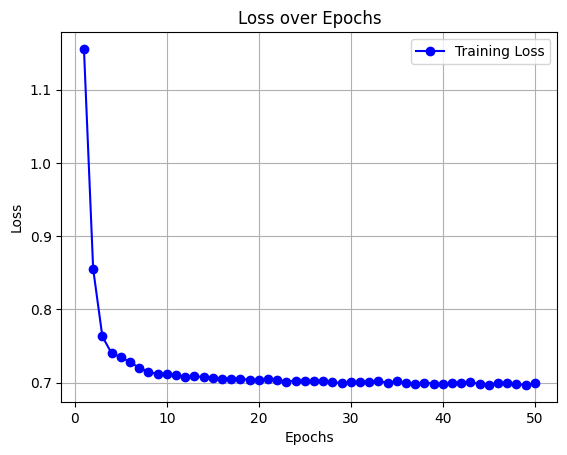

In [25]:
# Gerar gráfico da perda em função das épocas
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Validação do Modelo

In [29]:
import numpy as np
from sklearn.metrics import classification_report

# Função para calcular o erro de reconstrução (MSE)
def reconstruction_error(data, recon_data):
    return ((data - recon_data) ** 2).mean(dim=1)

# Função para calcular a precisão (não supervisionada) com base no limiar de erro
def calculate_anomaly_detection(model, test_loader, threshold):
    model.eval()  # Coloca o modelo em modo de avaliação
    predictions = []  # Lista para armazenar as predições do modelo
    errors = []  # Lista para armazenar os erros de reconstrução

    with torch.no_grad():  # Desativa a autograd para economia de memória
        for data in test_loader:  # Usando o test_loader aqui
            data = data[0].view(-1, input_dim)  # Redimensiona os dados
            recon_data, _, _ = model(data)  # Reconstrói os dados com o modelo

            # Calcula o erro de reconstrução
            error = reconstruction_error(data, recon_data)
            errors.extend(error.numpy())

            # Classifica como 1 (anômalo) se erro > threshold; 0 (normal) caso contrário
            pred = (error > threshold).float()
            predictions.extend(pred.numpy())

    # Visualizando os resultados
    print("Erro de reconstrução (MSE) para os dados de teste")
    print(f"Média do erro de reconstrução: {np.mean(errors):.4f}")
    print(f"Desvio padrão do erro de reconstrução: {np.std(errors):.4f}")

    return predictions, errors

# Defina o limiar (threshold)
threshold = 0.12  # Ajuste o valor do limiar conforme necessário

# Calcule a detecção de anomalias usando o DataLoader de teste
predictions, errors = calculate_anomaly_detection(model, test_loader, threshold)

# Exiba um relatório de classificação fictício (sem rótulos verdadeiros, apenas para análise visual)
# Aqui você pode considerar "Normal" como 0 e "Anômalo" como 1
print("Relatório de classificação para anomalias:")
print(classification_report([0] * len(errors), predictions, target_names=["Normal", "Anômalo"], zero_division=1))



Erro de reconstrução (MSE) para os dados de teste
Média do erro de reconstrução: 0.0492
Desvio padrão do erro de reconstrução: 0.8761
Relatório de classificação para anomalias:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     77302
     Anômalo       0.00      1.00      0.00         0

    accuracy                           0.98     77302
   macro avg       0.50      0.99      0.49     77302
weighted avg       1.00      0.98      0.99     77302



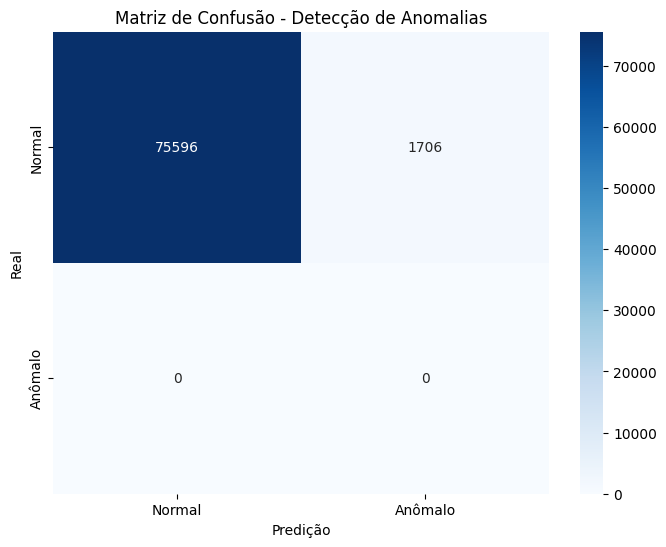

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Geração da matriz de confusão
conf_matrix = confusion_matrix([0] * len(errors), predictions)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anômalo"], yticklabels=["Normal", "Anômalo"])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Detecção de Anomalias')
plt.show()